# Digit Recognition - MNIST Data

In [ ]:
# Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
from tensorflow.keras.datasets import mnist
from image_transformer import transform_image
from models_SM import KNN
from models_HOG import HOG_Classifier
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

## Load the Training and Testing Data

The dataset contains 60,000 grayscale images of handwritten digits for training and 10,000 for testing. Each image is 28 by 28 pixels in size.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(f"Training Data Size: {X_train.shape}")
print(f"Testing Data Size: {X_test.shape}")

Training Data Size: (60000, 28, 28)
Testing Data Size: (10000, 28, 28)


## Distribution of Digits

Let's have a look into the frequency of each digit occur in the dataset to ensure no bias towards any particular digit.

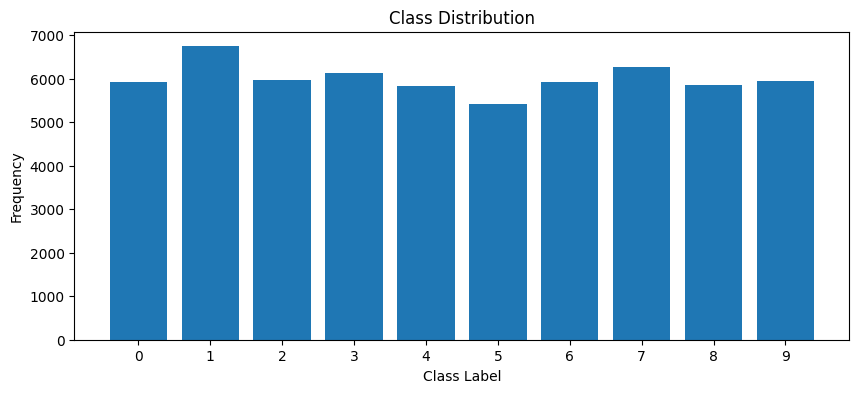

In [10]:
plt.figure(figsize = (10, 4))
labels, counts = np.unique(y_train, return_counts = True)
plt.bar(labels, counts)
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.xticks(labels)
plt.show()

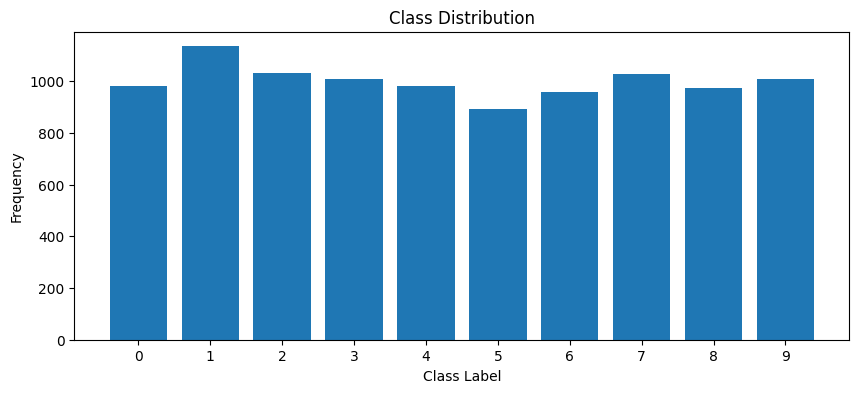

In [71]:
plt.figure(figsize = (10, 4))
labels, counts = np.unique(y_test, return_counts = True)
plt.bar(labels, counts)
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.xticks(labels)
plt.show()

The above barplot shows an almost uniform distribution, hence there won't be any bias!

## Testing on Algorithms

There are two algorithms which can be used for digit recognition:

- Shape Matching (SM): Uses the shape context to classify the labels.

- Histogram of Oriented Gradients (HOG): Uses the histograms to classify the labels.

### **Shape Matching**

Since this is a brute force algorithm, the time to classify 10000 samples would be very large, that is, the algorith has to compute the matching cost for every pair in the testing data to the training data. So, split the data to make sure it doesn't take too much time to make predictions.

In [ ]:
X_train_SM, y_train_SM = X_train[::8], y_train[::8]

# The indices of the samples where there is atleast one sample for each digit
test_samples = np.array([4030, 1765, 6097, 3843, 2783, 7162, 1625, 8545, 8606, 3685, 
                         3671, 3408, 749, 3688, 7321, 4902, 1413, 8809, 8572, 9752])
X_test_SM, y_test_SM = X_test[test_samples], y_test[test_samples]

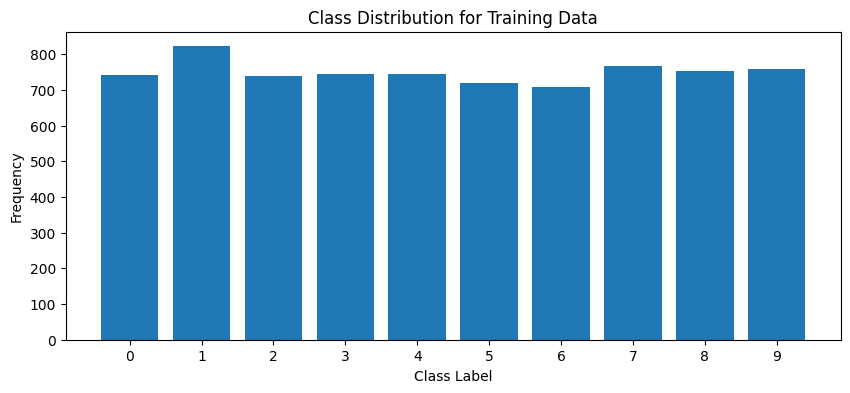

In [65]:
plt.figure(figsize = (10, 4))
labels, counts = np.unique(y_train_SM, return_counts = True)
plt.bar(labels, counts)
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Class Distribution for Training Data')
plt.xticks(labels)
plt.show()

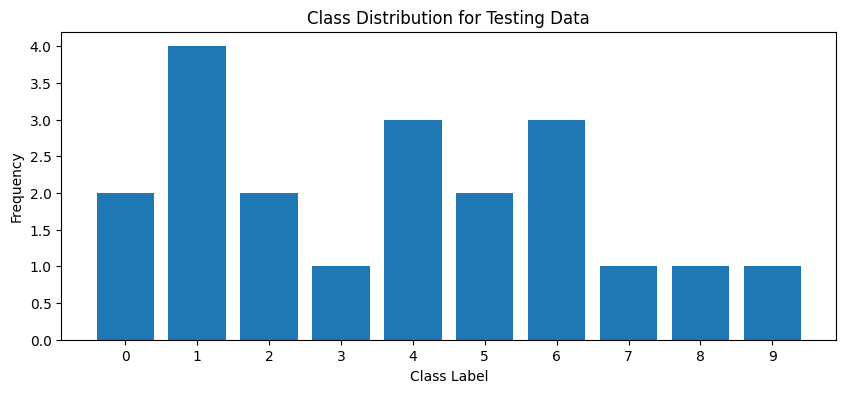

In [66]:
plt.figure(figsize = (10, 4))
labels, counts = np.unique(y_test_SM, return_counts = True)
plt.bar(labels, counts)
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Class Distribution for Testing Data')
plt.xticks(labels)
plt.show()

In [ ]:
# (beta, gamma) pairs
bg_vals = [(0.0, 0.0), (0.3, 0.0), (0.0, 1.6), (0.3, 1.6)]

accuracies = []
run_times = []

# Create KNN model
sm_model = KNN()

# Train the model
training_start_time = time.time()
sm_model.fit(X_train_SM, y_train_SM)
print(f"Time required to train the model: {time.time() - training_start_time:.2f} s")
print("-" * 75)

# Create PrettyTable
table = PrettyTable()
table.field_names = ["Beta", "Gamma", "Accuracy (%)", "Prediction Time (s)"]

# Test the model for each (beta, gamma) combination
for beta, gamma in bg_vals:
    start = time.time()
    preds = sm_model.predict(X_test_SM, beta = beta, gamma = gamma)
    elapsed_time = time.time() - start
    acc = sm_model.accuracy(preds, y_test_SM) * 100  # Convert to percentage
    
    # Save results
    accuracies.append(acc)
    run_times.append(elapsed_time)
    
    # Add row to table
    table.add_row([beta, gamma, f"{acc:.2f}", f"{elapsed_time:.2f}"])

# Print final results table
print(table)

Edge Detection is done!
Computation of Descriptors is done!
---------------------------------------------------------------------------
Time required to train the model: 17.23 s
---------------------------------------------------------------------------
Edge Detection is done!
Computation of Descriptors is done!
---------------------------------------------------------------------------
Predicting...
Progress: [##################################################] 100% (1/20)
Progress: [##################################################] 100% (2/20)
Progress: [##################################################] 100% (3/20)
Progress: [##################################################] 100% (4/20)
Progress: [##################################################] 100% (5/20)
Progress: [##################################################] 100% (6/20)
Progress: [##################################################] 100% (7/20)
Progress: [##################################################] 100% (8/

### **Histogram of Oriented Gradients**

The same training data is used here as well considering computational costs. But the testing data is uniformly splitted as one sample for every 8 samples.

In [ ]:
# KNN classification model
hog_model1 = HOG_Classifier(classifier = 'KNN')
start_time = time.time()
hog_model1.fit(X_train[::8], y_train[::8])
print(f"Time required to train the model: {time.time() - training_start_time:.2f} s")
print("-" * 75)

# Predictions
start = time.time()
preds = hog_model1.predict(X_test[::8])
print(f"Prediction Time: {time.time() - start}")
print(f"Accuracy: {hog_model1.accuracy(y_test[::8], preds)}")

Time required to train the model: 17564.39 s
---------------------------------------------------------------------------
Prediction Time: 34.45617604255676
Accuracy: 0.9528


In [ ]:
# SVM classification model
hog_model2 = HOG_Classifier(classifier = 'SVM')
start_time = time.time()
hog_model2.fit(X_train[::8], y_train[::8])
print(f"Time required to train the model: {time.time() - training_start_time:.2f} s")
print("-" * 75)

# Predictions
start = time.time()
preds = hog_model2.predict(X_test[::8])
print(f"Prediction Time: {time.time() - start}")
print(f"Accuracy: {hog_model2.accuracy(y_test[::8], preds)}")

Time required to train the model: 24880.99 s
---------------------------------------------------------------------------
Prediction Time: 48.42862510681152
Accuracy: 0.9832
